In [1]:
# Dependencies
%matplotlib inline
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import scipy.stats as st
from scipy.stats import linregress
import seaborn as sns
import gmaps
import numpy as np



In [2]:
# Import merged vaccine and case data
VaxCase_df = pd.read_csv("Merge1_cases_vax_06FEB21.csv")

In [3]:
# Drop the weird extra column
VaxCase_df.drop("Unnamed: 0",axis=1,inplace=True)

In [4]:
VaxCase_df.head()

,date,STABBREV,positive,State,Tot_Deliv,Tot_Admin,First_Dose,Two_Doses
0,20210206,AK,53279,Alaska,248500,139147,103163,35773
1,20210206,AL,471311,Alabama,804100,455173,370275,84278
2,20210206,AR,306064,Arkansas,540050,374674,290153,81564
3,20210206,AZ,779093,Arizona,1186000,766788,629750,136236
4,20210206,CA,3320862,California,6963500,4137600,3389906,727993


In [5]:
VaxCase_df.groupby(by=["STABBREV"])
VaxCase_df.head()


,date,STABBREV,positive,State,Tot_Deliv,Tot_Admin,First_Dose,Two_Doses
0,20210206,AK,53279,Alaska,248500,139147,103163,35773
1,20210206,AL,471311,Alabama,804100,455173,370275,84278
2,20210206,AR,306064,Arkansas,540050,374674,290153,81564
3,20210206,AZ,779093,Arizona,1186000,766788,629750,136236
4,20210206,CA,3320862,California,6963500,4137600,3389906,727993


In [6]:
# Plot number of cases and total vaccines delivered to state
x = VaxCase_df['positive']
y = VaxCase_df['Tot_Deliv']

#VaxCase_df.plot.scatter(x, y)

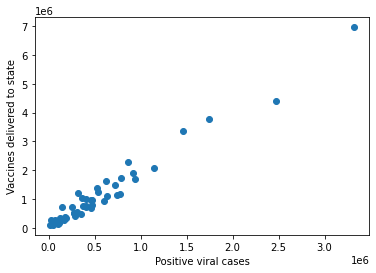

In [7]:
plt.scatter(x,y)
plt.xlabel('Positive viral cases')
plt.ylabel('Vaccines delivered to state')
plt.show()

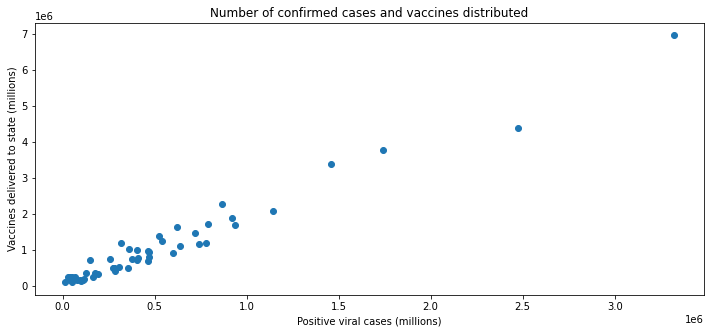

In [8]:
plt.figure(figsize=(12,5))
plt.scatter(VaxCase_df.iloc[:,2],VaxCase_df.iloc[:,4])
plt.xlabel('Positive viral cases (millions)')
plt.ylabel('Vaccines delivered to state (millions)')
plt.title("Number of confirmed cases and vaccines distributed")

plt.show()

Text(63.625, 0.5, 'Vaccines delivered to state (millions)')

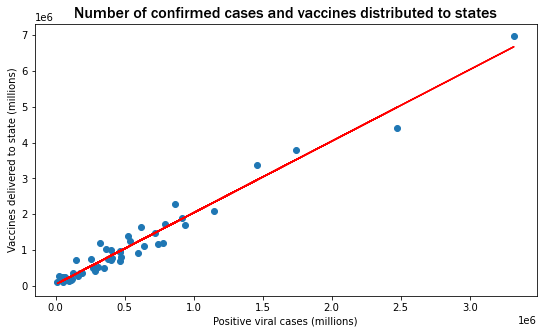

In [9]:
# Add the linear regression equation and line to plot
x = VaxCase_df['positive']
y = VaxCase_df['Tot_Deliv']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(9,5))
# plt.savefig('DosesCasesLR.png', dpi=300)
plt.scatter(x,y)
# plt.savefig('DosesCasesLR.png', dpi=300)
plt.plot(x,regress_values,"r-")
plt.savefig('DosesCasesLR.png', dpi=300)
plt.title("Number of confirmed cases and vaccines distributed to states",fontsize=16,fontname="Franklin Gothic Medium")
plt.xlabel('Positive viral cases (millions)')
plt.ylabel('Vaccines delivered to state (millions)')
#plt.show()

In [10]:
# There is strong positive correlation between vaccines delivered to states and the number of positive viral cases.

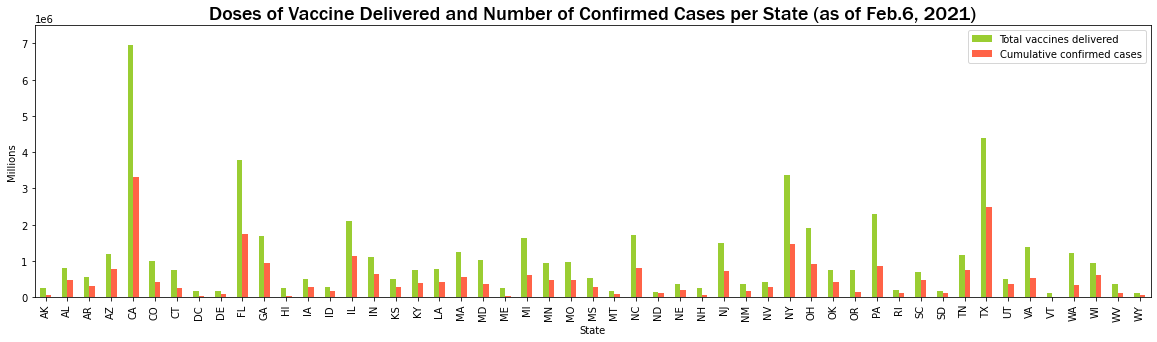

In [11]:
Vax = VaxCase_df.plot(x='STABBREV', y=['Tot_Deliv', 'positive'], kind="bar", figsize=(20,5),color={'Tot_Deliv': "yellowgreen", 'positive': "tomato"})

Vax.set_ylim((0, 7500000))
Vax.set_xlabel("State")
Vax.set_ylabel("Millions")
Vax.legend(["Total vaccines delivered", "Cumulative confirmed cases"]);
plt.title("Doses of Vaccine Delivered and Number of Confirmed Cases per State (as of Feb.6, 2021)",fontsize=20,fontname="Franklin Gothic Medium")
plt.savefig('DosesCasesBar.png', dpi=300)

In [12]:
# Import population data by state
Pop_df = pd.read_csv("CensusST_19.csv")
Pop_df.head()

,Name,Population
0,Alabama,4876250
1,Alaska,737068
2,Arizona,7050299
3,Arkansas,2999370
4,California,39283497


In [13]:
# I think I need to rename a column to make the join
Pop_df.rename(columns = {'Name':'State'}, inplace = True) 
Pop_df.head()

,State,Population
0,Alabama,4876250
1,Alaska,737068
2,Arizona,7050299
3,Arkansas,2999370
4,California,39283497


In [14]:
# merge vaccine/case data with Census data on state name
merge_final = Pop_df.merge(VaxCase_df, how='outer', on='State')
merge_final.head()

,State,Population,date,STABBREV,positive,Tot_Deliv,Tot_Admin,First_Dose,Two_Doses
0,Alabama,4876250,20210206,AL,471311,804100,455173,370275,84278
1,Alaska,737068,20210206,AK,53279,248500,139147,103163,35773
2,Arizona,7050299,20210206,AZ,779093,1186000,766788,629750,136236
3,Arkansas,2999370,20210206,AR,306064,540050,374674,290153,81564
4,California,39283497,20210206,CA,3320862,6963500,4137600,3389906,727993


In [15]:
merge_final['perpos'] = merge_final['positive']/ merge_final['Population']*100
merge_final['pervax_2'] = merge_final['Two_Doses']/ merge_final['Population']*100
merge_final['perimm'] = (merge_final['Two_Doses'] + merge_final['positive'])/ merge_final['Population']*100
merge_final['per60'] = merge_final['Population']*.6
merge_final['per80'] = merge_final['Population']*.8
merge_final['caseRT'] = merge_final['positive']/merge_final['Population']*100000
merge_final.head()

,State,Population,date,STABBREV,positive,Tot_Deliv,Tot_Admin,First_Dose,Two_Doses,perpos,pervax_2,perimm,per60,per80,caseRT
0,Alabama,4876250,20210206,AL,471311,804100,455173,370275,84278,9.665440,1.728336,11.393776,2925750.0,3901000.0,9665.439631
1,Alaska,737068,20210206,AK,53279,248500,139147,103163,35773,7.228505,4.853419,12.081925,442240.8,589654.4,7228.505375
2,Arizona,7050299,20210206,AZ,779093,1186000,766788,629750,136236,11.050496,1.932344,12.982839,4230179.4,5640239.2,11050.495873
3,Arkansas,2999370,20210206,AR,306064,540050,374674,290153,81564,10.204276,2.719371,12.923647,1799622.0,2399496.0,10204.276231
4,California,39283497,20210206,CA,3320862,6963500,4137600,3389906,727993,8.453580,1.853178,10.306758,23570098.2,31426797.6,8453.580393


In [16]:
merge_final.to_csv("Merge_case_vax_pop_09FEB21.csv", index=False)

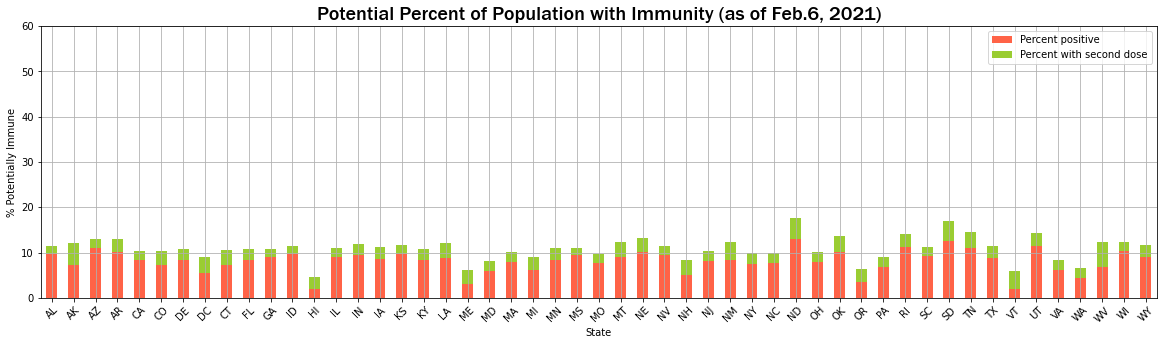

In [19]:
# Idea here is to do a stacked bar for each state which shows %cases and %vax for each state
# Would also like to show a symbol for where on the bar 60% and 80% of the population would fall
# y-axis in bold

Immunity = merge_final.plot(x='STABBREV', y=['perpos', 'pervax_2'], kind="bar", stacked = True, figsize=(20,5),color={'pervax_2': "yellowgreen", 'perpos': "tomato"})

Immunity.set_ylim((0, 60))
Immunity.set_xlabel("State")
Immunity.set_ylabel("% Potentially Immune")
Immunity.legend(["Percent positive", "Percent with second dose"]);
# Immunity.axhline(0, color='k')
plt.xticks(rotation=45 )
plt.grid(True)
plt.title("Potential Percent of Population with Immunity (as of Feb.6, 2021)",fontsize=20,fontname="Franklin Gothic Medium")
plt.savefig('ImmunityBar.png', dpi=300)


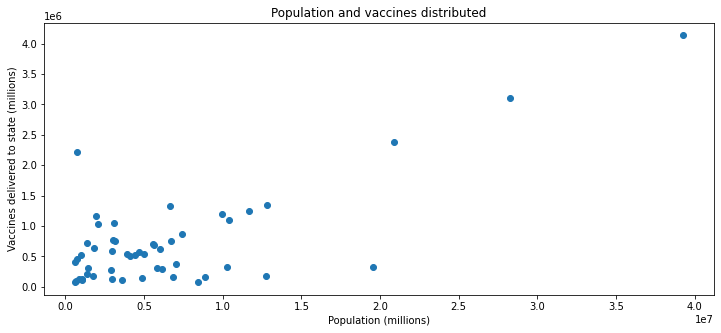

In [22]:
plt.figure(figsize=(12,5))
plt.scatter(merge_final.iloc[:,1],VaxCase_df.iloc[:,5])
plt.xlabel('Population (millions)')
plt.ylabel('Vaccines delivered to state (millions)')
plt.title("Population and vaccines distributed")

plt.show()